# Lab 4 : Visualization - Part 1

In [30]:
from IPython.display import Image
from IPython.core.display import HTML 

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from random import randrange
from scipy import stats
import pandas as pd
import seaborn as sns
from itertools import combinations
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Part A : Correlation circle

In this exercise you will visualize and analyze the characteristics of some of the majors vacation resorts in France. The results are shown in the Figure below (attributes in red and resort cities in blue).

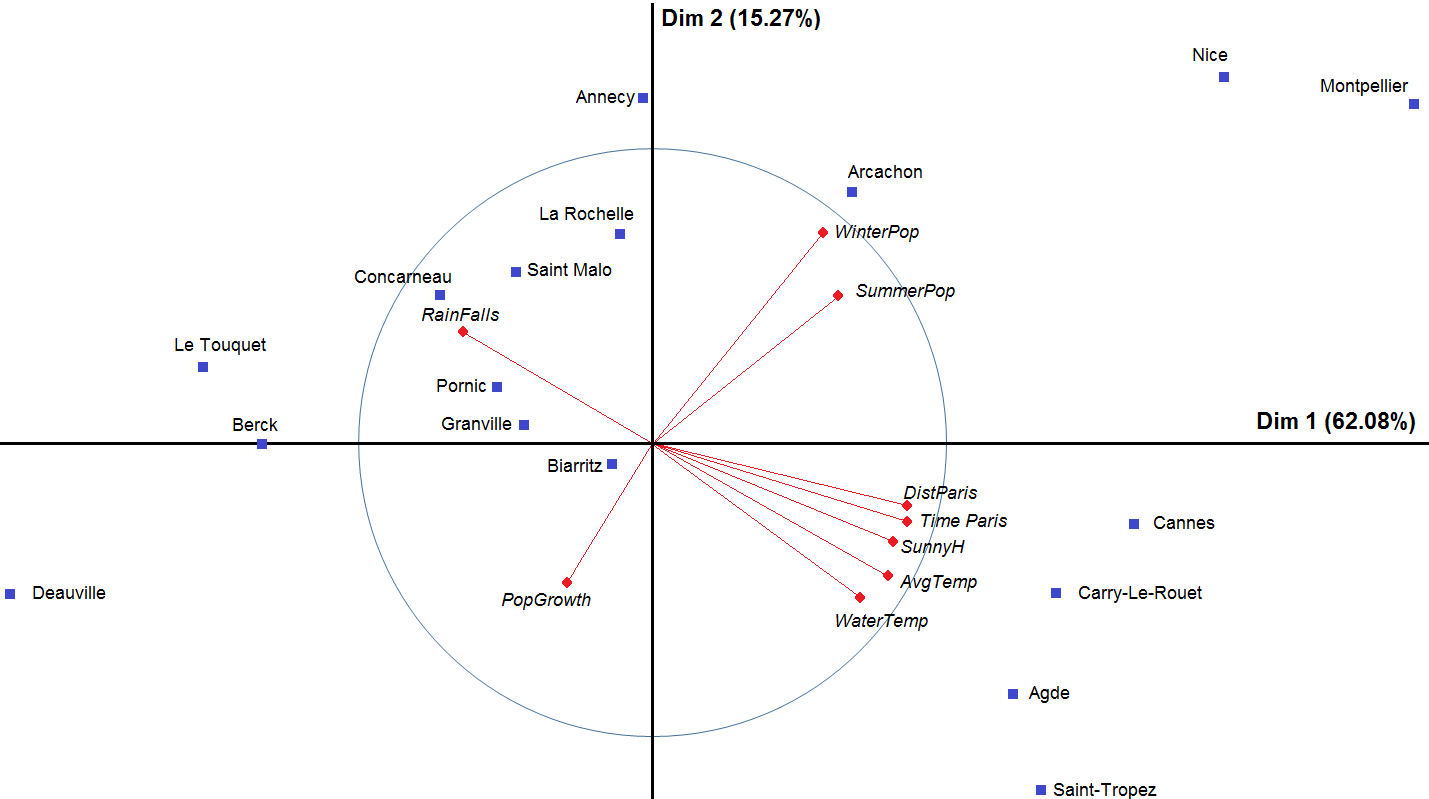

In [32]:
Image("Data/cercle3.png")

- WinterPop: Winter population (no tourists)
- SummerPop: Summer population (with hordes of tourists)
- PopGrowth: Population growth between December and July (in percentage)
- RainFalls: Average rain falls in July (in mm)
- DistParis: Distance from Paris (in km)
- TimeParis: Travel time from Paris (in h)
- SunnyH: Average number of sunny hours in July (in h)
- AvgTemp: Average temperature in July (in Celsius)
- WaterTemp: Water temperature in July should the beach open (in Celsius)

#### Question 1 : What are the percentages in the X and Y axis ? Comment.

<u>Answer 1 : </u>

They are the percentage of explained variance for the two principal components. We have 62.08+15.27=77.35% of kept variance, which is fine for a dataset on resorts. We can therefore use the correlation circle to make some hypothesis, with a mild risk of misinterpretation.

#### Question 2 : Using the figure and only the figure, answer the following questions and justify your answers :
- a) Which city has the warmest water in July ?
- b) Which city has the biggest population growth between winter and summer ?
- c)True or False : Attributes "DistParis" and "TimeParis" are redundant.
- d) In the original data, the city of Annecy has the highest amount of rain falls in July. Is it also true in this Figure ? If yes, justify. If no, explain how this could be possible.
- e) True or False : Cities with the smallest winter population have the biggest population growth when the tourists arrive.
- f) True or False : It gets sunnier when going farther from Paris.	
- g) True or False : In Annecy, there is less population in summer than in winter.
- h) Which 2 cities are the most similar ?

<u>Answer 2 </u>

a) Saint-Tropez \
b) Deauville  \
c) While the two variables have a low angle, they are not overlapping. Furthermore we have some information lost : so False, they are not redundant. \
d) It is not the case in the dataset. It can be easily explained by the 23% of information loss. \
e) Popgrowth and Winterpop have an almost 180° angle, they have therefore a strong negative correlation: As such, it is true and cities with a lower winter population have the strongest growth. \
f) DistParis and SunnyH have a very small angle : they are positively correlated. So : True. \
g) We can't answer : all we can say is that Annecy experiences below average growth than the other cities in Summer, but the correlation circle can't give the sign over the projected variables. \
h) If we consider that we have enough kept variance: Pornic and Granville are the closest ones.

## Part B : PCA on the Iris data

Fisher's Iris are one of the most famous dataset: it describes the characteristics of 150 iris flowers based on their petals and sepals. The dataset contains 3 balanced classes representing 3 subspecies of the Iris flower (50 of each): Iris Virginica, Iris Setosa, and Iris Versicolor. One of the 3 class can easily be distinguished from the other 2 that are less separable. The goal of this exercise is to visually study this dataset using PCA.

#### Question 1 : Open the iris.csv data file using the pandas library.

In [33]:
iris = pd.read_csv("Data/iris.csv")
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


#### Question 2 : Notice that the last colum of the dataset correspond to a class and not features. Extract the featuresfrom the dataset. To do so, you can use the *tolist()* attribute of the column function.

In [34]:
feat_names = iris.columns.tolist()
feat_names.remove("Class")
print(feat_names)

['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']


#### Question 3 : In order to display your future PCA, each class will have to be associated with a specific color. To do so, extract the list of unique species using the *unique* function from numpy applied to the "Class" attribute of your dataset

In [35]:
species = np.unique(iris["Class"].values)
species

array(['setosa', 'versicolor', 'virginica'], dtype=object)

#### Question 4 : Center and reduce your data. You may do so using the package *StandardScaler* from sklearn, and the function of the same name.

In [36]:
scaler = StandardScaler()
dfn = iris.copy()
dfn[feat_names] = scaler.fit_transform(dfn[feat_names])
dfn

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,-0.900681,1.032057,-1.341272,-1.312977,setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,setosa
2,-1.385353,0.337848,-1.398138,-1.312977,setosa
3,-1.506521,0.106445,-1.284407,-1.312977,setosa
4,-1.021849,1.263460,-1.341272,-1.312977,setosa
...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,virginica
146,0.553333,-1.281972,0.705893,0.922064,virginica
147,0.795669,-0.124958,0.819624,1.053537,virginica
148,0.432165,0.800654,0.933356,1.447956,virginica


#### Question 5 :  Using the PCA algorithm from sklearn.decomposition, initialize the PCA algorithm for 4 components (even if we will only use 2 to visualize), and then fit and transform your centered and reduced dataset.

In [37]:
pca = PCA(n_components=4)
iris_pca = pca.fit_transform(dfn[feat_names])

#### Question 6 : Using the correct attributes of the PCA object, display the explained variance for the 4 components. What can you say about the amount of information kept on the first 2 components that will be used to visualize ?

In [38]:
pc1 = round(pca.explained_variance_ratio_[0] * 100,2)
pc2 = round(pca.explained_variance_ratio_[1] * 100,2)
pc3 = round(pca.explained_variance_ratio_[2] * 100,2)
pc4 = round(pca.explained_variance_ratio_[3] * 100,2)

[pc1 , pc2, pc3, pc4]

[72.77, 23.03, 3.68, 0.52]

<u> Answer 6 : </u>

72.77+23.03=95.8%, so the two first components keep more than 95% of the information.

#### Question 7 : Display the 2 first components on a scatterplot to visualize the result. You will need to use the dictionnary you created in Question 3, as well as the explained variance of component 1 and 2 from question 6 that you will display on the axes. Comment on the result and class separation. 

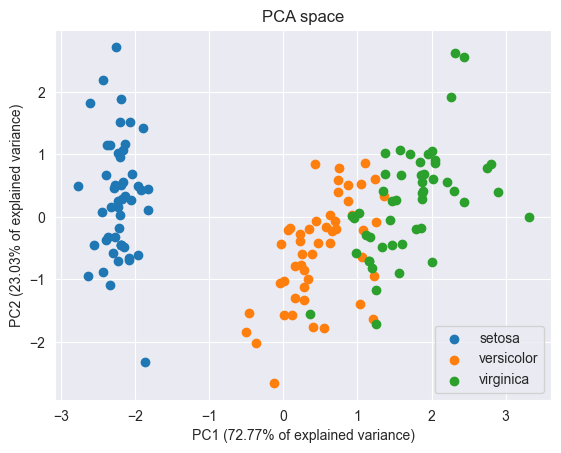

In [39]:
fig, ax = plt.subplots();
for specy in species:
    ax.scatter(iris_pca[iris["Class"]==specy, 0], iris_pca[iris["Class"]==specy, 1],label=specy);

ax.legend();
ax.set_xlabel("PC1 ({0}% of explained variance)".format(pc1, fontsize=12));
ax.set_ylabel("PC2 ({0}% of explained variance)".format(pc2, fontsize=12));
ax.set_title('PCA space', fontsize=12);

<u>Answer 7 :</u>

The setosa flowers are well separated. The two other species are more difficult to tell appart as they don't have a clean separation.

#### Question 8 : Write a function to draw a correlation circle similar to the ones we saw in class for these data (you may use code from the internet, but you should indicate your sources and comment your code). Based on the result, comment on the relations between the different attributes.

In [40]:
#recall the dataset properties
nb_samples, nb_features = iris.shape
nb_features -= 1

#eigenvalue
eigval = pca.explained_variance_
print("eigenvalues: {0}".format(eigval))

#Corrected eigenvalue
eigval = (nb_samples - 1) / nb_samples * eigval
print("corrected eigenvalues: {0}".format(eigval))

#eigen value square root
sqrt_eigval = np.sqrt(eigval)

print("eigenvalues square root: {0}".format(sqrt_eigval))

eigenvalues: [2.93035378 0.92740362 0.14834223 0.02074601]
corrected eigenvalues: [2.91081808 0.92122093 0.14735328 0.02060771]
eigenvalues square root: [1.70611198 0.95980255 0.38386622 0.14355385]


In [41]:
#correlation of variables with axes
corvar = np.zeros((nb_features, nb_features))

for k in range(nb_features):
    corvar[:, k] = pca.components_[k, :] * sqrt_eigval[k]

Text(0.5, 1.0, 'Correlation circle')

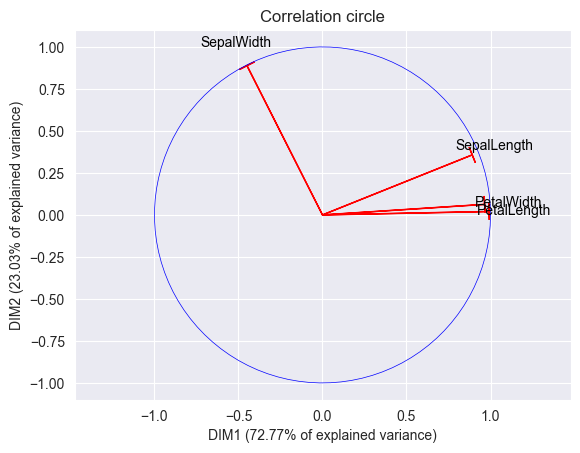

In [42]:
#Draw the correlation circle    
fig, ax = plt.subplots()
an = np.linspace(0, 2 * np.pi, 100)
ax.plot(np.cos(an), np.sin(an), 'b', linewidth=0.5) 
# Add a unit circle for scale
#<c> Break the line of code above </c>
for i in range(0, corvar.shape[0]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             corvar[i, 0],  #PC1
             corvar[i, 1], #PC2
             head_width=0.1,
             head_length=0,
             color = 'r')    
    ax.text(corvar[i, 0]* 1.15, corvar[i, 1] * 1.15,
    feat_names[i], color = 'k', ha = 'center',
    va = 'center')

ax.axis('equal')
ax.set_xlabel("DIM1 ({0}% of explained variance)".format(pc1, fontsize=11))
ax.set_ylabel("DIM2 ({0}% of explained variance)".format(pc2, fontsize=11))
ax.set_title('Correlation circle')

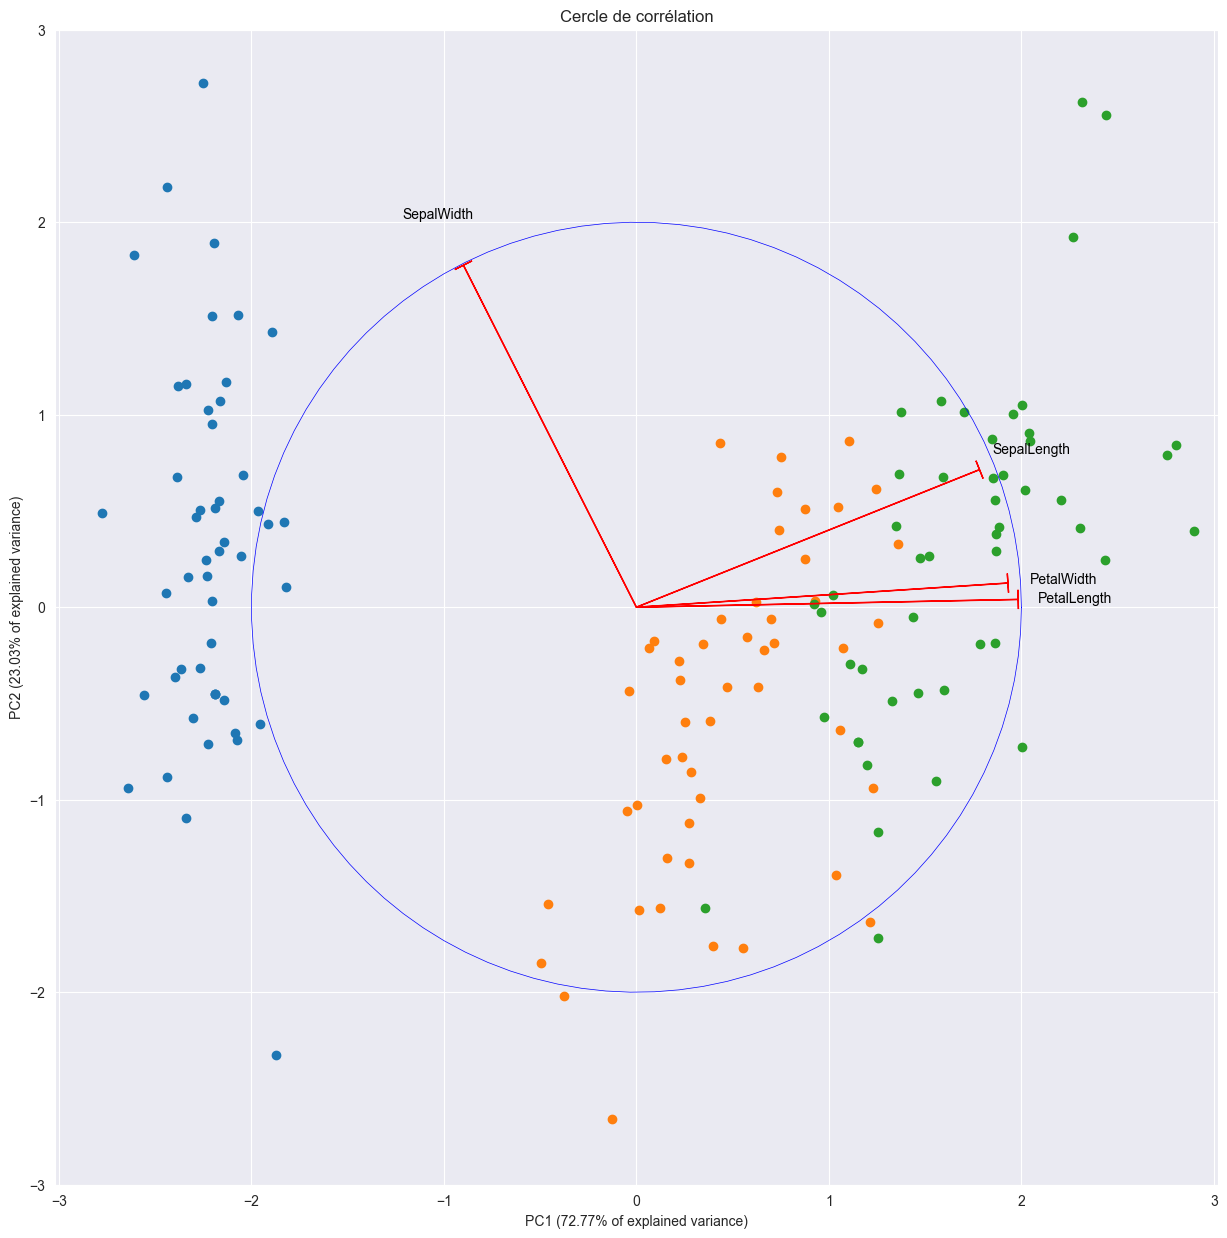

In [43]:
#combining both the circle and the points

fig, ax = plt.subplots(figsize=(15,15))

#zoom factor
fzoom = 2.0

#empty circle
an = np.linspace(0, 2 * np.pi, 100)
ax.plot(fzoom*np.cos(an), fzoom*np.sin(an), 'b', linewidth=0.5) 

#loop for the data
for specy in species:
    ax.scatter(iris_pca[iris["Class"]==specy, 0], iris_pca[iris["Class"]==specy, 1],label=specy)

#loop for the variables
for i in range(0, corvar.shape[0]):
    ax.arrow(0, 0, fzoom*corvar[i, 0], fzoom*corvar[i, 1], head_width=0.1, head_length=0, color = 'r')    
    ax.text(fzoom*corvar[i, 0]* 1.15, fzoom*corvar[i, 1] * 1.15, feat_names[i], color = 'k', ha = 'center', va = 'center')

#title, axis and legends  
ax.axis('equal')
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_xlabel("PC1 ({0}% of explained variance)".format(pc1, fontsize=12));
ax.set_ylabel("PC2 ({0}% of explained variance)".format(pc2, fontsize=12));
ax.set_title('Cercle de corrélation');

## Part C : Europe Data

You will now re-apply what you saw in the previous exercise on a dataset with features from different European countries

#### Question 1 : Open the europe_en.csv dataset. Then display its characteristics and clouds of points to visualize all the attributes.

In [44]:
europe = pd.read_csv("Data/europe_en.csv",sep=";", index_col=0);
europe.head(35)

,population (M),Nominal GDP (kM$),GDP per inhabitant ($),Unemployement rate (%),Public debt (%/GDP),HDI,Press Freedom Index,Gini Index
Country,,,,,,,,
France,68.014,2937.000,44747,7.800,112.581,0.903,78.53,32.4
Germany,84.079,4256.000,51103,3.200,70.871,0.942,82.04,31.7
United Kingdom,67.886,3376.000,49761,4.100,87.831,0.929,78.71,35.1
Belgium,11.507,610.000,52484,5.900,107.473,0.937,78.86,27.2
Spain,46.935,1435.000,30156,13.378,116.384,0.905,76.71,34.3
Portugal,10.302,252.000,24495,6.500,121.643,0.866,87.07,32.8
Italy,59.030,2058.000,34777,9.300,150.568,0.895,68.16,35.2
Switzerland,8.738,842.000,96390,2.600,41.464,0.962,82.72,33.1
Austria,8.859,480.000,53371,5.200,80.746,0.916,76.74,30.2


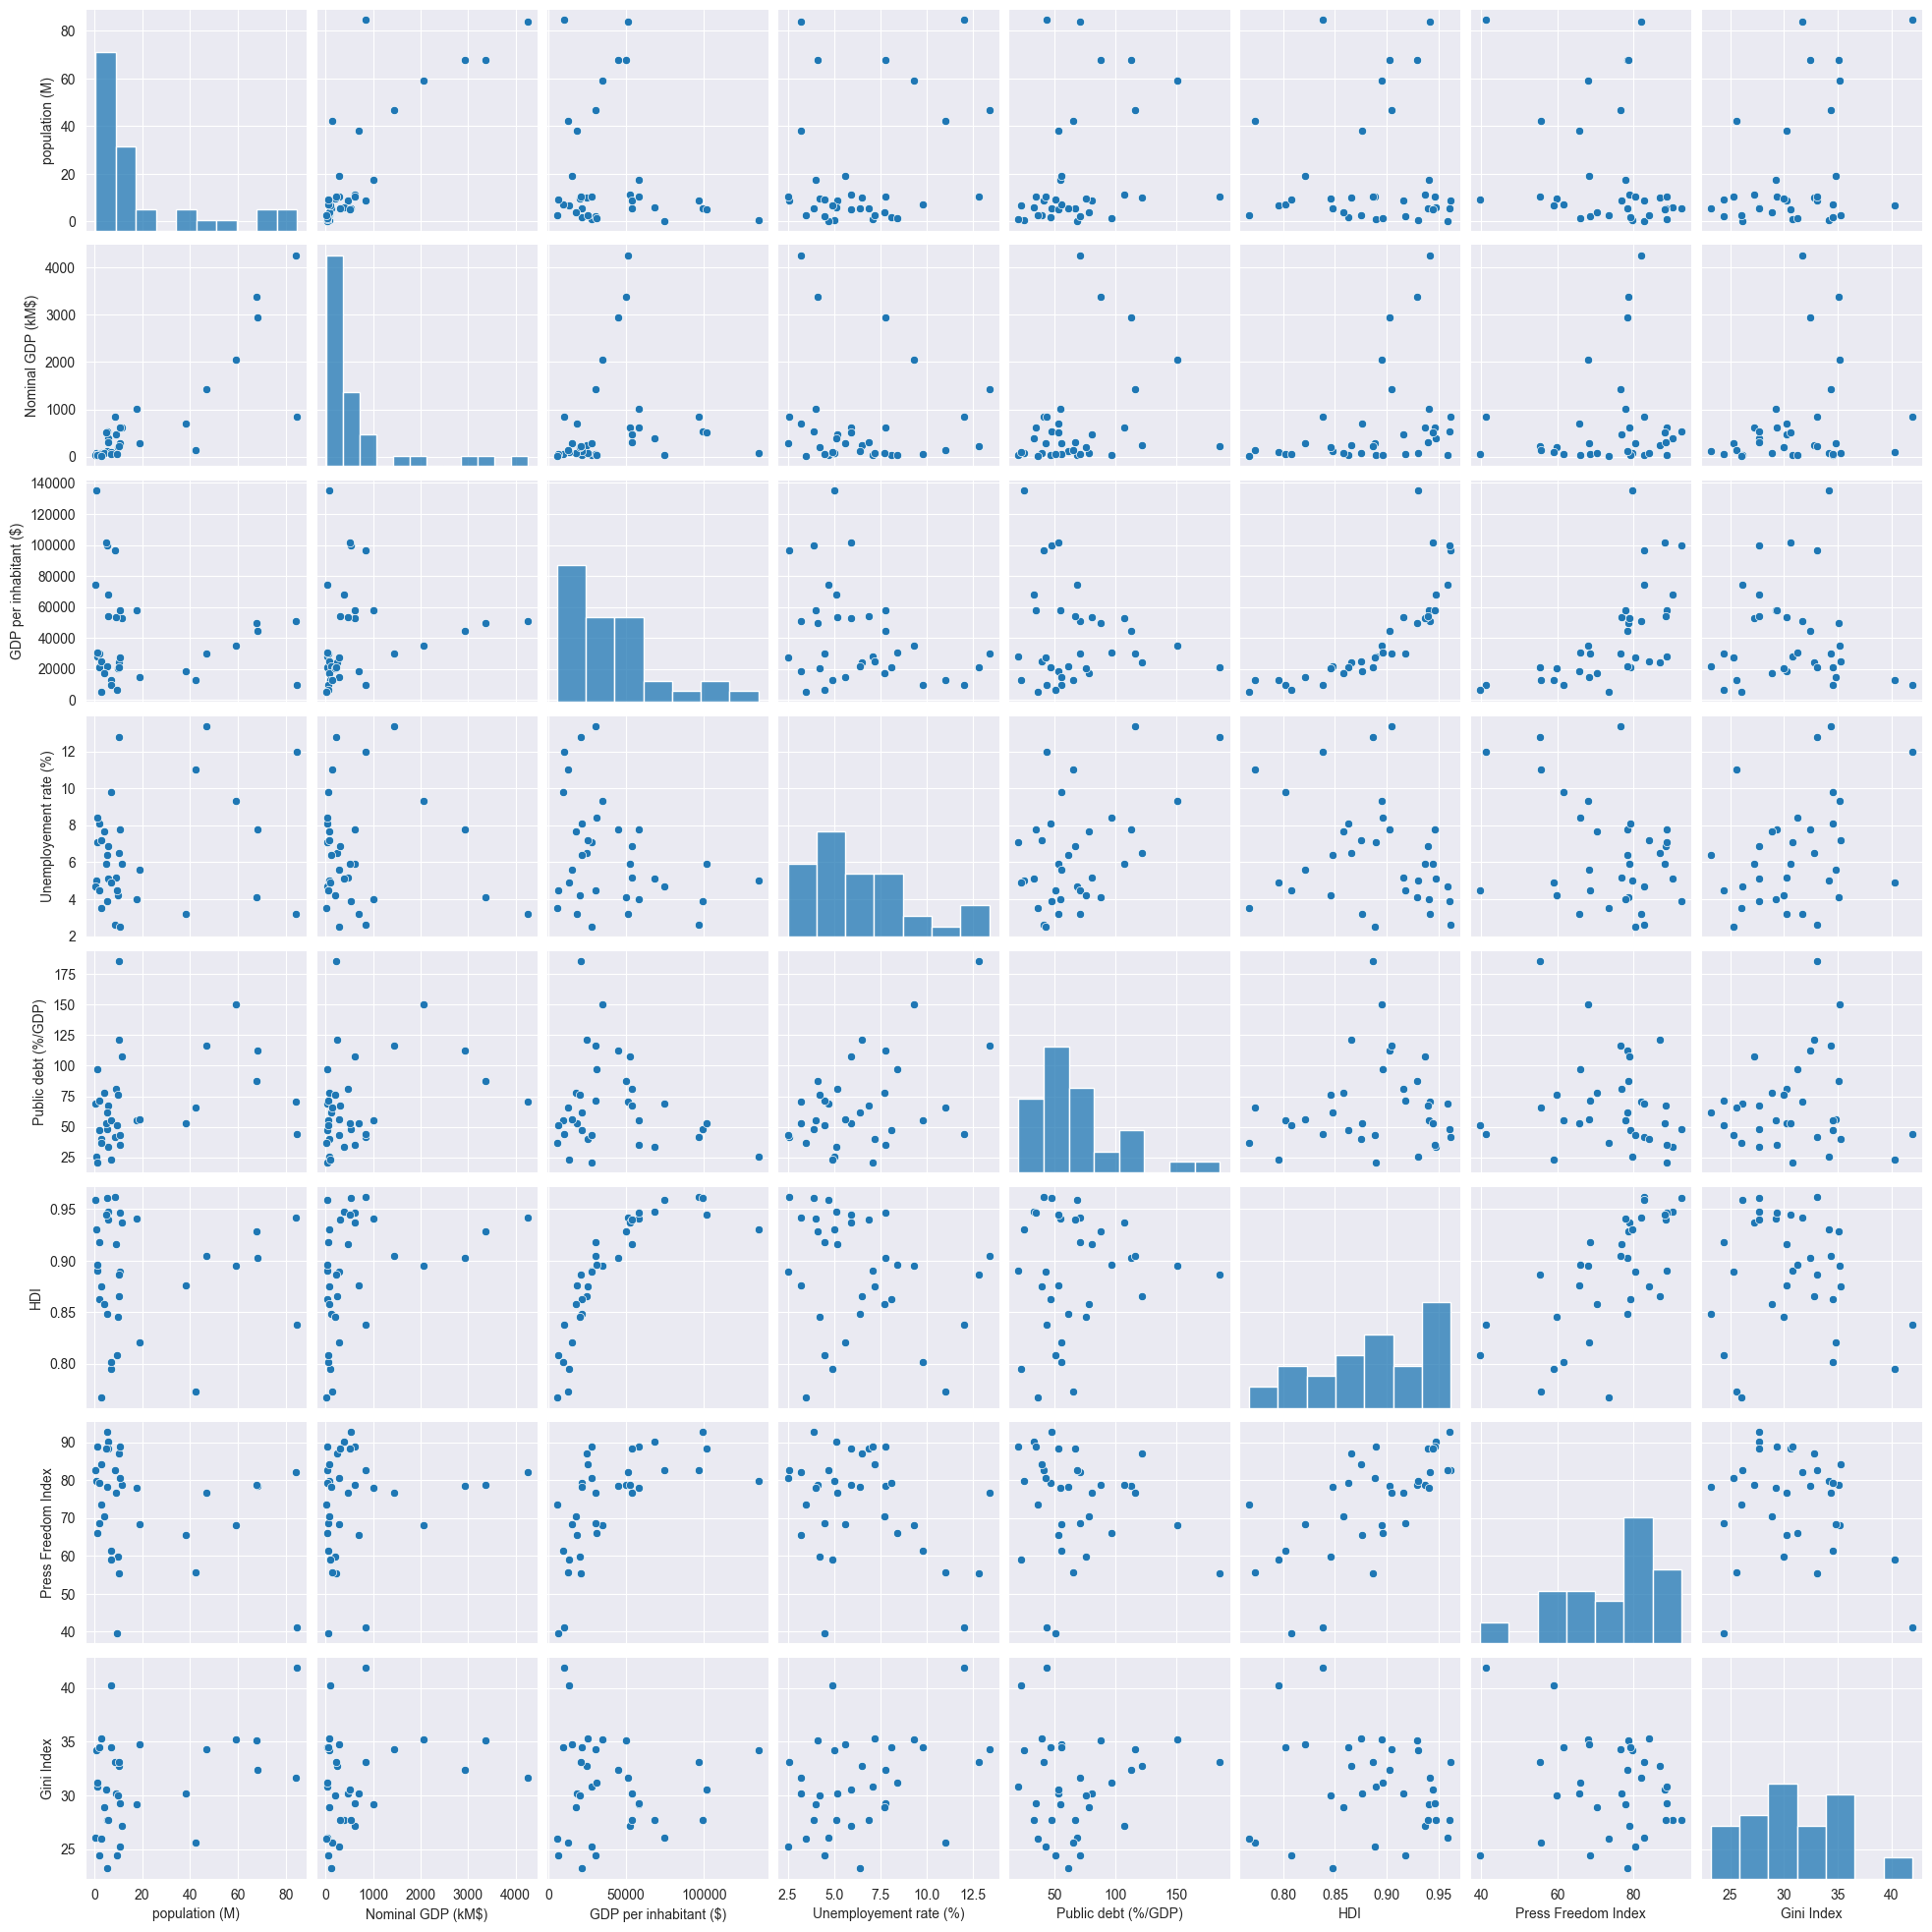

In [45]:
sns.pairplot(europe)
plt.show()

#### Question 2 : Using pieces of code from the previous part, draw the correlation circle and PCA projection for this new dataset.

In [46]:
nlignes, ncol = europe.shape
feat_names=europe.columns.tolist()

europe_cr = europe.copy()
scaler = StandardScaler()
europe_cr[feat_names] = scaler.fit_transform(europe[feat_names])

In [47]:
pca = PCA(n_components=ncol)
europe_pca = pca.fit_transform(europe_cr[feat_names])

pc1 = round(pca.explained_variance_ratio_[0] * 100,2)
pc2 = round(pca.explained_variance_ratio_[1] * 100,2)
[pc1, pc2]

[34.95, 28.1]

In [48]:
vpropres = pca.explained_variance_
sqrt_vpropres = np.sqrt(vpropres)

corvar = np.zeros((ncol, ncol))
for k in range(ncol):
    corvar[:, k] = pca.components_[k, :] * sqrt_vpropres[k]

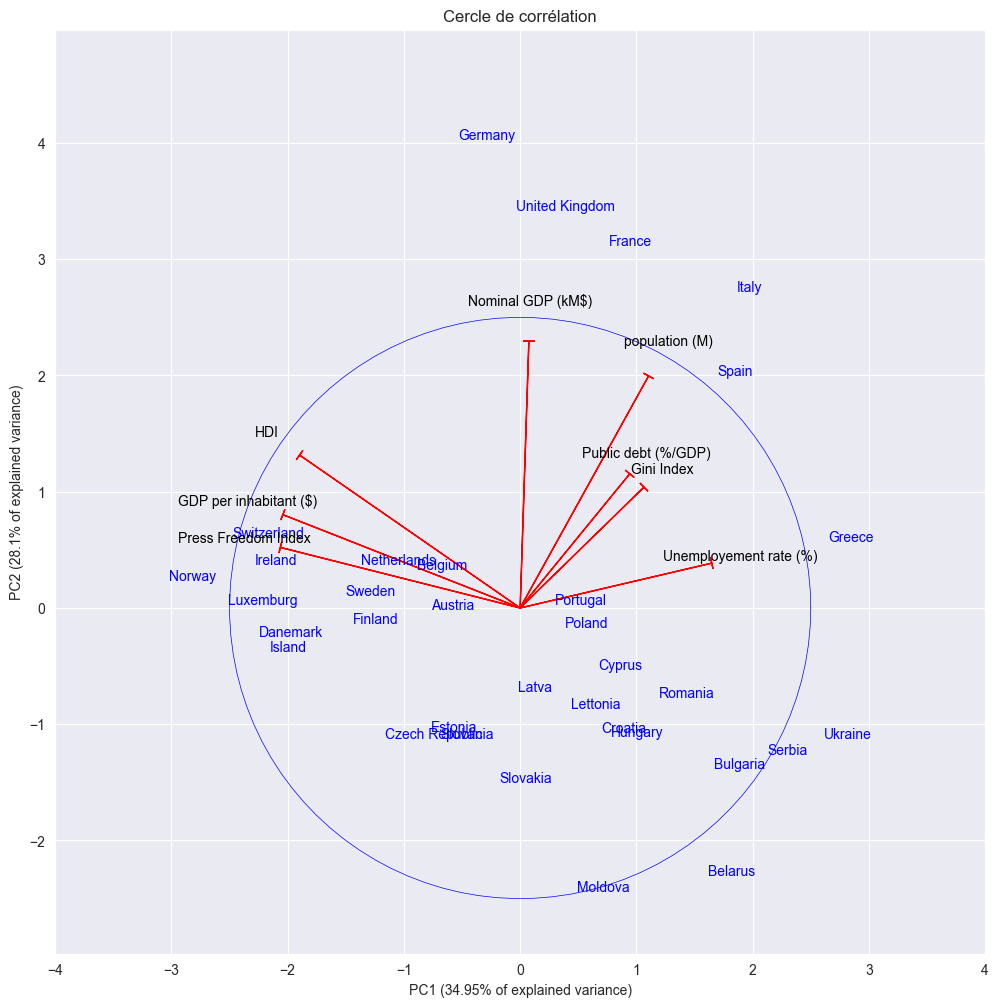

In [49]:
fig, ax = plt.subplots(figsize=(12,12))

fzoom = 2.5

for l in range(0, nlignes):
    ax.annotate(europe.index[l], (europe_pca[l, 0], europe_pca[l, 1]),color='b')


for i in range(0, corvar.shape[0]):
    ax.arrow(0, 0, fzoom*corvar[i, 0], fzoom*corvar[i, 1], head_width=0.1, head_length=0, color = 'r')    
    ax.text(fzoom*corvar[i, 0]* 1.15, fzoom*corvar[i, 1] * 1.15, feat_names[i], color = 'k', ha = 'center', va = 'center')
    
an = np.linspace(0, 2 * np.pi, 100)
ax.plot(fzoom*np.cos(an), fzoom*np.sin(an), 'b', linewidth=0.5)     
    
#titres et légendes    
ax.axis('equal')
ax.set_xlim([-4, 4])
ax.set_ylim([-3, 5])
ax.set_xlabel("PC1 ({0}% of explained variance)".format(pc1, fontsize=12));
ax.set_ylabel("PC2 ({0}% of explained variance)".format(pc2, fontsize=12));
ax.set_title('Cercle de corrélation');

#### Question 3 : Comment the results of the previous question. What can you say about groups of countries and the links between the different variables ?

<u>Answer 3 : </u>

We have groups of countries that match their global cultural sphere and/or geopolitical region.

#### Question 4 : Compute the actual correlation matrice for this dataset, display it as a heatmap, and comment on the results compared with the correlation circle.

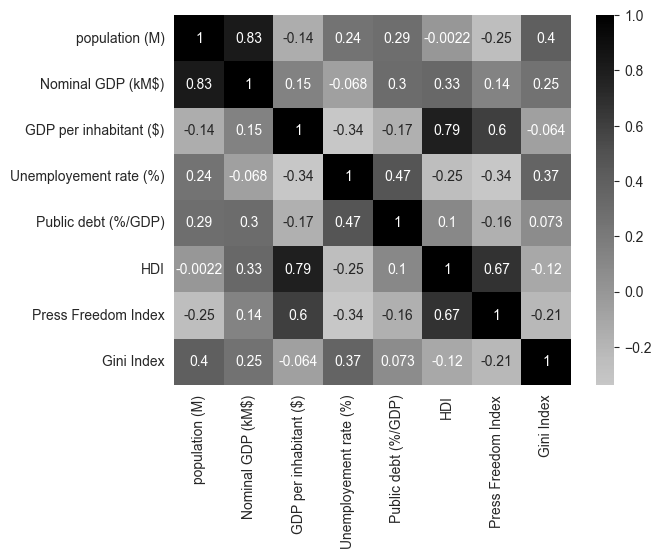

In [50]:
sns.heatmap(europe.corr(),annot=True,center=0,cmap="Greys")
plt.show()

<u>Answer 4 :</u>

We see that the correlation circle mostly matches with the correlation heatmap. However, some divergence exist with some correlations from the circle being much stronger than the actual ones in the dataset.

## Part D : AFC on the parents and studies dataset

In this exercise, we will come back to the dataset about social and economics data that we used for bivariate analysis. Recall that it was a survey conducted on 2440 students to see if there is a link between the social background of their parents and the type of studies they follow.

Below is a list of translations that you might need :
- IUT/BTS : Technical studies in 2 years after highschool
- Écoles d'ingénieurs : 5 years of enginering studies through the 'Grandes Écoles' track program.
- Univ\_Science : Any science program at the university (Bachelor's, Master's or PhD)
- Univ\_Socio : Any social science program at the university (Bachelor's, Master's or PhD)
- Médecine : A 7 to 9 years program to become a medical doctor
- Ouvriers : Worker class
- Employés : Mid level employees and clercs
- Cadre : High level employees and managerial staff
- Libéraux (Profession Liberales) : Liberal Professions, high-end independant workers (lawyers, doctors, architects, surgeons, etc.)

#### Question 1 : Open the stats_socio.csv dataset.

In [51]:
stats = pd.read_csv("Data/stats_socio.csv",sep=",")    
stats.head()

,Etudes,Parents,Cout_total
0,Ecole_Commerce,Cadres,37960
1,Ecole_Commerce,Profession_Liberale,54000
2,Ecole_Commerce,Profession_Liberale,64000
3,Ecole_Commerce,Profession_Liberale,56000
4,Ecole_Commerce,Profession_Liberale,64000


Just as in the previous lab, we will add the column "cout_d" which will contain the different ranges of prices for higher studies.

In [52]:
#création de la colonne "cout_d"
stats['cout_d'] = stats.loc[:, 'Cout_total']
stats['cout_d']= "0-10"
stats.loc[stats['Cout_total']>10000,'cout_d']= "10-20"
stats.loc[stats['Cout_total']>20000,'cout_d']= "20-30"
stats.loc[stats['Cout_total']>30000,'cout_d']= "30-40"
stats.loc[stats['Cout_total']>40000,'cout_d']= "40-50"
stats.loc[stats['Cout_total']>50000,'cout_d']= "50-60"
stats.loc[stats['Cout_total']>60000,'cout_d']= "60+"

Luckily doing a CA analysis in Python is much easier than drawing a correlation circle. To do so, you will need to use cross tables and the CA() tool from the prince librarie.

In [53]:
import prince

#### Question 2 : Create 2 crosstables "Studies/parents" and "Parents/cout_d".

In [54]:
tab_EP = pd.crosstab(stats['Etudes'],stats['Parents'])
tab_PC = pd.crosstab(stats['Parents'],stats['cout_d'])

#### Question 3 : Rename the lines and columns of your tables to replace "Etudes" by "Children studies", "cout_d" by "price of studies", and "Parents" by "Parents job category".

In [55]:
tab_EP.columns.rename('Parents job category', inplace=True)
tab_EP.index.rename('Children studies', inplace=True)
tab_PC.columns.rename('Price of studies', inplace=True)
tab_PC.index.rename('Parents job category', inplace=True)

#### Question 4 : Use the CA object from the prince library to perform the Correspondance analysis on your first table. Display the inertia and comment.

In [56]:
ca = prince.CA(n_components=2,copy=True)
ca.fit(tab_EP)

ca.plot(tab_EP,x_component=0,y_component=1,show_row_markers=True,show_column_markers=True,show_row_labels=True,show_column_labels=True)


alt.LayerChart(...)

<u>Answer 4 : </u>

We find mostly the same results than last lab with the chi square test.  Some types of children studies are strongly link with the parents' type of job (e.g. Profession libérales and écoles de commerce).

#### Question 5 : Same question for the second crosstable

In [57]:
ca = prince.CA(n_components=2,copy=True)
ca.fit(tab_PC)

ca.plot(tab_PC,x_component=0,y_component=1,show_row_markers=True,show_column_markers=True,show_row_labels=True,show_column_labels=True)


alt.LayerChart(...)

<u>Answer 5 :</u>
    
Same : we see some pretty strong ties, especially for higher price studies.

#### Question 6 : Based on your results from lab 3 and the answers to the last 2 questions, comment on the complementarity of CA with a khi square analysis.

<u>Answer 6 : </u>

We reach the same conclusion, but visualizing helps complement the histograms from last lab.